##**[Can You Create an Unbeatable Tic-Tac-Toe AI Player?](https://sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p013/artificial-intelligence/min-max-tic-tac-toe)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


## Setting Up the Tic-Tac-Toe Board

In [2]:
def display_board(board):
    """
    Display the current state of the Tic-Tac-Toe board.

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.

    Each cell of the board is displayed, separated by '|' for columns,
    and rows are separated by a line of dashes ('-----').

    Example:
    If the board is [['X', 'O', ' '], [' ', 'X', 'O'], ['O', ' ', 'X']],
    the output will be:
    X|O|
    -----
     |X|O
    -----
    O| |X
    """
    for i, row in enumerate(board):
        # Display the cells of the current row, separated by '|'
        print('|'.join(row))

        # Display a line of dashes to separate rows, but not after the last row
        if i < len(board) - 1:
            print('-' * 5)

In [3]:
# Create a 3x3 grid to represent the Tic-Tac-Toe board
# The nested list comprehension fills the board with empty spaces (' ')
board = [[' ' for _ in range(3)] for _ in range(3)]

# Call the display_board function to print the current state of the board
display_board(board)

 | | 
-----
 | | 
-----
 | | 


## Preparing the Game Environment

In [4]:
def check_win(board, player):
    """
    Check if the specified player has won the Tic-Tac-Toe game.

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.
    - player (str): The player to check for a win ('X' or 'O').

    Returns:
    - bool: True if the specified player has won, False otherwise.

    This function checks for a win by the specified player in three directions: rows, columns, and diagonals.
    If a winning combination is found, the function returns True; otherwise, it returns False.

    Example:
    Calling check_win(board, 'X') returns True if 'X' has won the game.
    """
    # Check rows
    for row in board:
        if all(cell == player for cell in row):
            return True

    # Check columns
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True

    # Check diagonals
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True

    return False

In [5]:
def is_draw(board):
    """
    Check if the Tic-Tac-Toe game is a draw (no more empty spaces on the board).

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.

    Returns:
    - bool: True if the game is a draw, False otherwise.

    This function checks if there are no more empty spaces (' ') on the board, indicating a draw.

    Example:
    Calling is_draw(board) returns True if the game is a draw.
    """
    # Check if the game is a draw (no more empty spaces on the board)
    return all(cell != ' ' for row in board for cell in row)

In [6]:
def player_move(board):
    """
    Get the player's move (row and column) from the user input.

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.

    Returns:
    - tuple: The selected row and column coordinates.

    This function uses a while loop to repeatedly prompt the player for input
    until a valid move is entered. It ensures that the input consists of valid
    integers within the range 0-2 and that the chosen cell on the board is empty.
    If the input is invalid, an appropriate error message is displayed.

    Example:
    If the player enters '1' for the row and '2' for the column,
    and the corresponding cell on the board is empty, the function returns (1, 2).
    """
    while True:
        try:
            # Get input for row and column from the player
            row = int(input("Enter row (0, 1, 2): "))
            col = int(input("Enter column (0, 1, 2): "))

            # Check if the input is within the valid range and the selected cell is empty
            if 0 <= row <= 2 and 0 <= col <= 2 and board[row][col] == ' ':
                return row, col
            else:
                print("Invalid move. Try again.")
        except ValueError:
            # Handle the case where the input is not a valid integer
            print("Invalid input. Enter numbers between 0 and 2.")

## Building the Minimax AI Player

In [7]:
def minimax(board, depth, is_maximizing, max_depth):
    """
    Implement the Minimax algorithm for Tic-Tac-Toe.

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.
    - depth (int): The current depth in the recursive search of the game tree
    - is_maximizing (bool): Indicates whether the current player is maximizing (True) or minimizing (False).
    - max_depth (int): The maximum depth to explore in the game tree.

    Returns:
    - int: The calculated score for the current state of the board.

    This function recursively explores the game tree using the Minimax algorithm to determine the optimal move
    for the current player. It assigns scores to game states based on the outcome of the game or the specified depth.
    """

    # Base case: Check if the game is won by 'X' or 'O' or if it's a draw
    if check_win(board, 'X'):
        return -1                 # 'X' wins, return a negative value
    elif check_win(board, 'O'):
        return 1                  # 'O' wins, return a positive value
    elif is_draw(board) or depth == max_depth:
        return 0                  # It's a draw or reached the specified depth, return 0

    if is_maximizing:
        # If maximizing, initialize the maximum evaluation score to negative infinity
        max_eval = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    # Simulate the move for the maximizing player ('O')
                    board[i][j] = 'O'
                    # Recursively call minimax for the next level with the minimizing player's turn
                    eval = minimax(board, depth + 1, False, max_depth)
                    # Undo the move
                    board[i][j] = ' '
                    # Update the maximum evaluation score
                    max_eval = max(max_eval, eval)
        return max_eval
    else:
        # If minimizing, initialize the minimum evaluation score to positive infinity
        min_eval = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    # Simulate the move for the minimizing player ('X')
                    board[i][j] = 'X'
                    # Recursively call minimax for the next level with the maximizing player's turn
                    eval = minimax(board, depth + 1, True, max_depth)
                    # Undo the move
                    board[i][j] = ' '
                    # Update the minimum evaluation score
                    min_eval = min(min_eval, eval)
        return min_eval

In [8]:
def ai_move(board, max_depth):
    """
    Determine the optimal move for the AI player using Minimax algorithm.

    Parameters:
    - board (list): A 2D list representing the Tic-Tac-Toe board.
    - max_depth (int): The maximum depth to explore in the Minimax algorithm

    Returns:
    - tuple: The coordinates (row, column) of the optimal move for the AI player.

    This function iterates through each empty space on the board, simulates placing an 'O' in that space,
    and evaluates the move using the Minimax algorithm. The AI player chooses the move with the highest
    evaluation score.
    """
    best_eval = -float('inf')
    best_move = None

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                eval = minimax(board, 0, False, max_depth)
                board[i][j] = ' '
                if eval > best_eval:
                    best_eval = eval
                    best_move = (i, j)

    return best_move

## Playing the Game Against Our AI Player

In [2]:
def main():
    """
    Run the main game loop for a simple Tic-Tac-Toe game.

    The game loop alternates between player and AI turns, displaying the current state of the board after each move.
    The loop continues until there is a winner ('X' or 'O'), a draw, or the player chooses to exit the game.

    This function uses the display_board, player_move, ai_move, check_win, and is_draw functions to implement the game logic.

    Example:
    Calling main() starts and runs the Tic-Tac-Toe game until a winner is declared or the game ends in a draw.
    """

    # Reset the game board
    board = [[' ' for _ in range(3)] for _ in range(3)]

    player_turn = True

    while True:
        display_board(board)

        if player_turn:
            print("\n")
            print("Your turn:")
            row, col = player_move(board)
            print("\n")
            board[row][col] = 'X'
        else:
            print("\n")
            input("Press Enter for the Ai player to go...")
            """
            Change the depth explored by the AI player by changing the number in
            parentheses in the next line of code. The default value is 0.
            """
            row, col = ai_move(board, 0)    # TODO: Adjust the depth explored here!
            print("\n")
            board[row][col] = 'O'

        if check_win(board, 'X'):
            display_board(board)
            print("You win!")
            break
        elif check_win(board, 'O'):
            display_board(board)
            print("AI wins!")
            break
        elif is_draw(board):
            display_board(board)
            print("It's a draw!")
            break

        player_turn = not player_turn

if __name__ == "__main__":
    main()


NameError: name 'display_board' is not defined

credits -> https://www.neverstopbuilding.com/blog/minimax

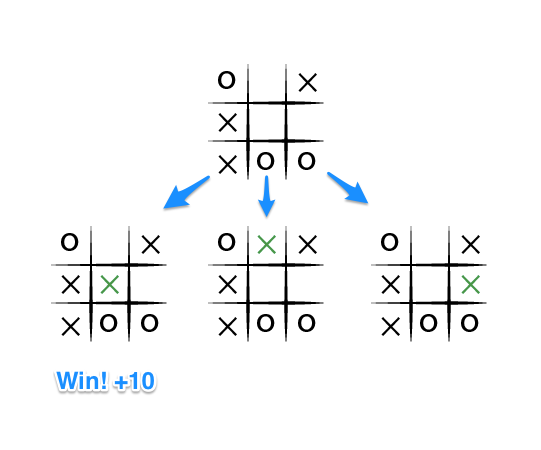



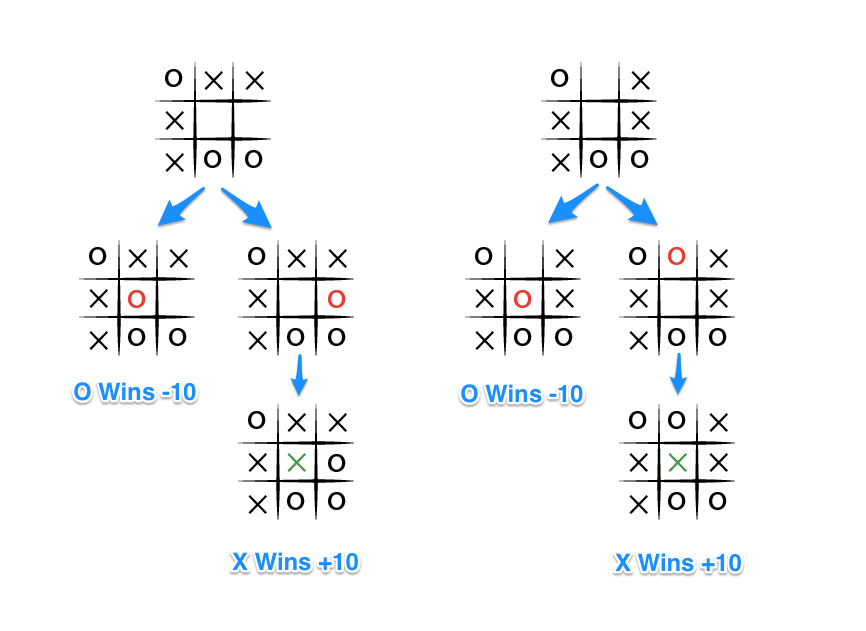

A description for the algorithm, assuming X is the "turn taking player," would look something like:

If the game is over, return the score from X's perspective.
Otherwise get a list of new game states for every possible move
Create a scores list
For each of these states add the minimax result of that state to the scores list
If it's X's turn, return the maximum score from the scores list
If it's O's turn, return the minimum score from the scores list

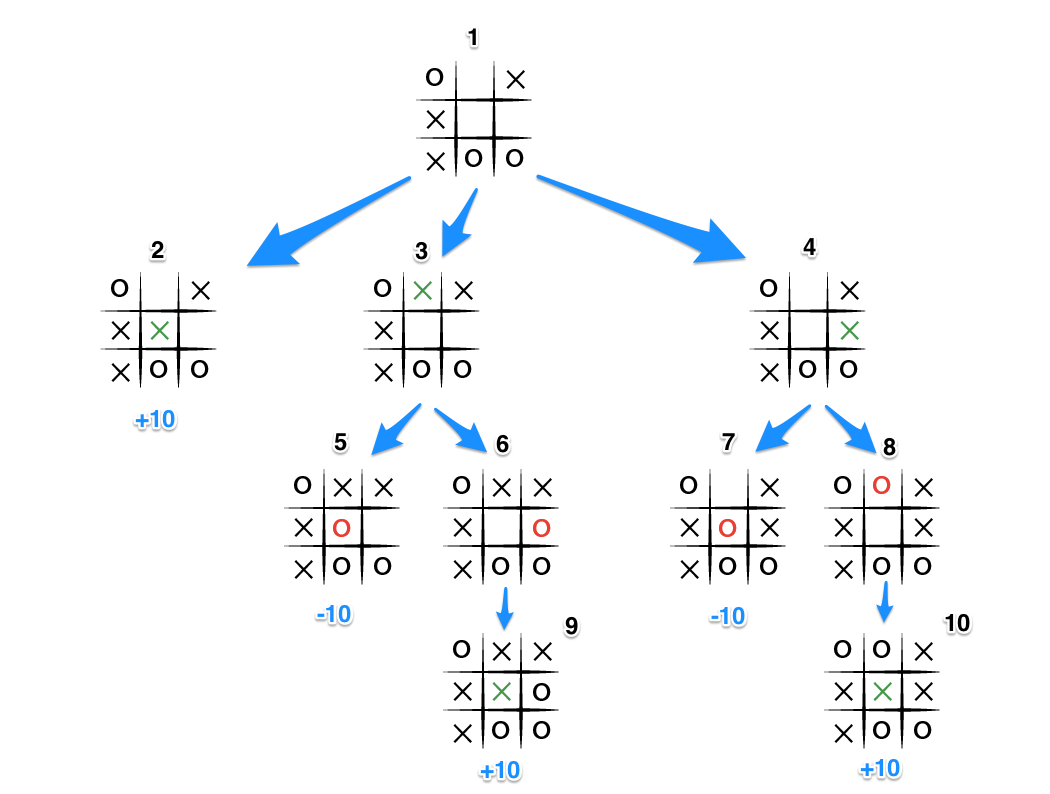

It's X's turn in state 1. X generates the states 2, 3, and 4 and calls minimax on those states.
State 2 pushes the score of +10 to state 1's score list, because the game is in an end state.
State 3 and 4 are not in end states, so 3 generates states 5 and 6 and calls minimax on them, while state 4 generates states 7 and 8 and calls minimax on them.
State 5 pushes a score of -10 onto state 3's score list, while the same happens for state 7 which pushes a score of -10 onto state 4's score list.
State 6 and 8 generate the only available moves, which are end states, and so both of them add the score of +10 to the move lists of states 3 and 4.
Because it is O's turn in both state 3 and 4, O will seek to find the minimum score, and given the choice between -10 and +10, both states 3 and 4 will yield -10.
Finally the score list for states 2, 3, and 4 are populated with +10, -10 and -10 respectively, and state 1 seeking to maximize the score will chose the winning move with score +10, state 2.

think one opponent wants to maximize the reward and the other wants to minimize the damages. it flips and goes back and forth. 

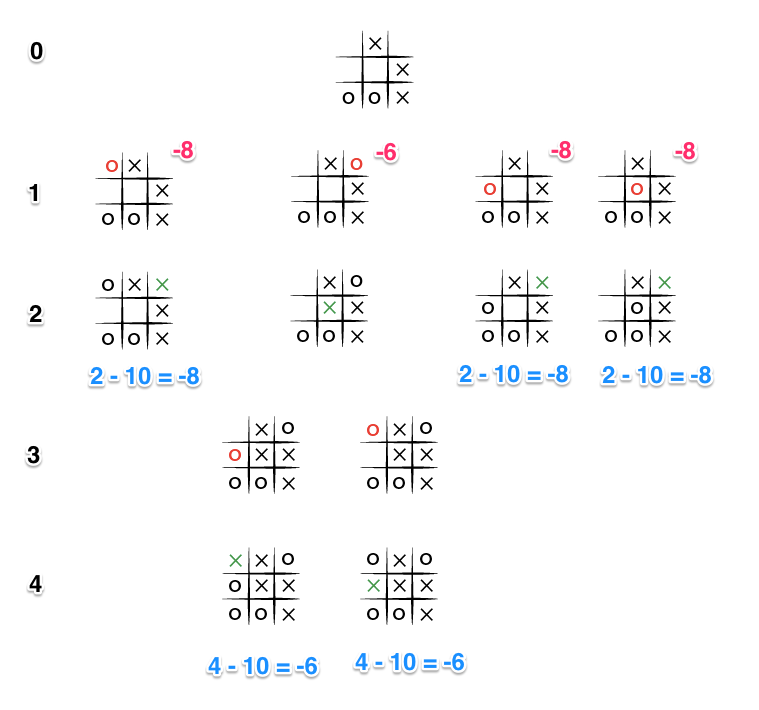

This time the depth (Shown in black on the left) causes the score to differ for each end state, and because the level 0 part of minimax will try to maximize the available scores (because O is the turn taking player), the -6 score will be chosen as it is greater than the other states with a score of -8. And so even faced with certain death, our trusty, perfect player now will chose the blocking move, rather than commit honor death.

"In zero-sum games, the minimax solution is the same as the Nash equilibrium" (second statement of contents of the article about Minimax). So the existence of Nash equilibrium is a generalization of the Minimax theorem."